<a href="https://colab.research.google.com/github/maxmussavian/euler-spiral/blob/main/acceleration_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
from matplotlib import pyplot as plt
import numpy as np

In [169]:
X = 1000. # length of segment
v = 60 / 3.6 # 60 km /h into m /s 
T_segment = X / v # time for each segments
time_step = 1 # how often to sample the steps

In [170]:
r = X / np.pi # radius of curve
print(f'the radius of semicircle is {r:10.2f}m')

the radius of semicircle is     318.31m


In [171]:
t_steps = np.arange(0, T_segment + time_step / 2, time_step) # times sampling

# Curve with Semicircles

Part 1: First Straight

In [172]:
x_first_straight = [t * v for t in t_steps]
y_first_straight = [0 * t for t in t_steps]
acceleration_first_straight   = [0 * t for t in t_steps]

Part 2: First Circular Bend

In [173]:
x_first_bend = [X + r * np.sin(t * np.pi / T_segment) for t in t_steps]
y_first_bend = [r * (1. - np.cos(t * np.pi / T_segment)) for t in t_steps]
acceleration_first_bend = [1/r * v ** 2 for t in t_steps]

Part 3: Second Straight

In [174]:
x_second_straight = [X - t * v for t in t_steps]
y_second_straight = [2 * r + 0 * t for t in t_steps]
acceleration_second_straight   = [0 * t for t in t_steps]

Part 4: Second Curve

In [175]:
x_second_bend = [-r * np.sin(t * np.pi / T_segment) for t in t_steps]
y_second_bend = [r * (1 + np.cos(t * np.pi / T_segment)) for t in t_steps]
acceleration_second_bend = [1/r * v ** 2 for t in t_steps]


In [176]:
x_pos_sc = np.concatenate(
    [x_first_straight, x_first_bend, x_second_straight, x_second_bend]
    )
y_pos_sc = np.concatenate(
    [y_first_straight, y_first_bend, y_second_straight, y_second_bend]
    )
acceleration_sc = np.concatenate(
    [acceleration_first_straight, acceleration_first_bend,
     acceleration_second_straight, acceleration_second_bend
     ])

Text(0, 0.5, 'Acceleration $\\frac{m}{s^2}$')

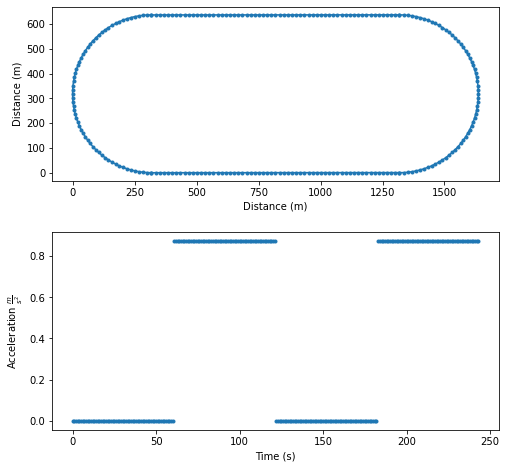

In [177]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(x_pos_sc + r, y_pos_sc, '.-')
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Distance (m)')
ax[0].set_aspect('equal')
ax[1].plot(acceleration_sc, '.')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel(r'Acceleration $\frac{m}{s^2}$')

# Curve with Euler Spiral

In [178]:
import scipy.special as sc
S_1, C_1 = sc.fresnel(1)

Here we calculate the curvature for the track so that width matches the original width.

In [179]:
alpha = np.pi * S_1 ** 2 / r **2 

In [180]:
print(alpha)

5.9554090571766435e-06


In [181]:
width_curve = np.sqrt(np.pi / alpha) * C_1
height_curve = np.sqrt(np.pi / alpha) * S_1

Part 1: First straight section

In [182]:
X_short = X + 2 * r - 2 * width_curve 
T_straight_segment = X_short / v
t_steps = np.arange(0, T_straight_segment + time_step / 2, time_step) # times sampling

In [183]:
x_first_straight = [t * v for t in t_steps]
y_first_straight = [0 * t for t in t_steps]
acceleration_first_straight = [0 * t for t in t_steps]

Part 2: First Curved Section

In [184]:
half_arc_length = np.sqrt(np.pi / alpha)
print(f'arc length -> {2 * half_arc_length}')
print(f'radius of circle at apex -> {1/(alpha * half_arc_length)}')

arc length -> 1452.610347458528
radius of circle at apex -> 231.19011718446035


In [185]:
T_half_arc_length = half_arc_length / v
print(f'time spent on curve -> {2 * T_half_arc_length:10.2f}s')
t_steps = np.arange(0, T_half_arc_length + time_step / 2, time_step)

time spent on curve ->      87.16s


In [186]:
s_c_grid = np.asarray([sc.fresnel(t / T_half_arc_length) for t in t_steps])

x_first_half_bend = np.array([np.sqrt(np.pi / alpha) * c + X_short for _, c in s_c_grid])
x_first_bend = np.concatenate([x_first_half_bend, np.flip(x_first_half_bend)])


In [187]:
y_first_half_bend = np.array([np.sqrt(np.pi / alpha) * s for s, _ in s_c_grid])
y_first_bend = np.concatenate([y_first_half_bend, 2 * r - np.flip(y_first_half_bend)])


In [188]:
acceleration_first_half_bend = np.array([alpha * v * t * v ** 2 for t in t_steps])
acceleration_first_bend = np.concatenate([acceleration_first_half_bend, np.flip(acceleration_first_half_bend)])

Part 3: Straight Sections

In [189]:
X_short = X + 2 * r - 2 * width_curve 
T_straight_segment = X_short / v
t_steps = np.arange(0, T_straight_segment + time_step / 2, time_step) # times sampling

In [190]:
x_second_straight = [X_short - t * v for t in t_steps]
y_second_straight = [2 *r - 0 * t for t in t_steps]
acceleration_second_straight = [0 * t for t in t_steps]

Part 4: Second Curved Section

In [191]:
t_steps = np.arange(0, T_half_arc_length + time_step / 2, time_step)

s_c_grid = np.asarray([sc.fresnel(t / T_half_arc_length) for t in t_steps])

x_second_half_bend = np.array([-np.sqrt(np.pi / alpha) * c for _, c in s_c_grid])
x_second_bend = np.concatenate([x_second_half_bend, np.flip(x_second_half_bend)])

y_second_half_bend = np.array([2 * r - np.sqrt(np.pi / alpha) * s for s, _ in s_c_grid])
y_second_bend = np.concatenate([y_second_half_bend, 2 * r - np.flip(y_second_half_bend)])

acceleration_second_half_bend = np.array([alpha * v * t * v ** 2 for t in t_steps])
acceleration_second_bend = np.concatenate([acceleration_second_half_bend, np.flip(acceleration_second_half_bend)])

In [192]:
x_pos_euler = np.concatenate(
    [x_first_straight, x_first_bend, x_second_straight, x_second_bend]
    )
y_pos_euler = np.concatenate(
    [y_first_straight, y_first_bend, y_second_straight, y_second_bend]
    )
acceleration_euler = np.concatenate(
    [acceleration_first_straight, acceleration_first_bend,
     acceleration_second_straight, acceleration_second_bend
     ])

Text(0, 0.5, 'Acceleration $\\frac{m}{s^2}$')

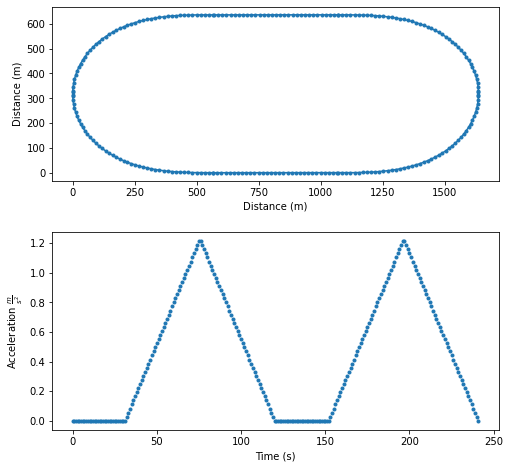

In [193]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(x_pos_euler + width_curve, y_pos_euler, '.-')
ax[0].set_aspect('equal')
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Distance (m)')
ax[1].plot(acceleration_euler, '.')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel(r'Acceleration $\frac{m}{s^2}$')
ax[1].set

In [194]:
total_arc_length = np.sqrt(np.pi / alpha)
print(total_arc_length)
print(1/(alpha * total_arc_length))

726.305173729264
231.19011718446035


In [195]:
total_arc_length * 4 - 2 * np.pi * r

905.2206949170559

In [196]:
2 * 504 + 4 * total_arc_length

3913.220694917056

Comparing the tracks

Text(0, 0.5, 'Distance (m)')

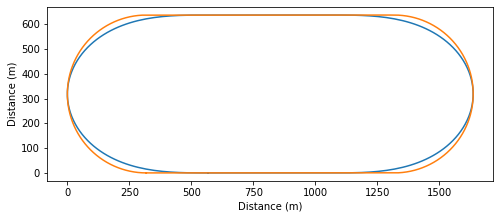

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(x_pos_euler + width_curve, y_pos_euler, '-')
ax.set_aspect('equal')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Distance (m)')

ax.plot(x_pos_sc + r, y_pos_sc, '-')
ax.set_aspect('equal')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Distance (m)')

In [198]:
r

318.3098861837907

In [199]:
504/ (16/3.6)

113.39999999999999